<a href="https://colab.research.google.com/github/sahilg50/CNN-ON-MNIST/blob/master/CNN_on_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
single_image = x_train[0]

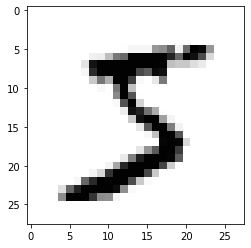

In [ ]:
plt.imshow(single_image, cmap='Greys')

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
 from tensorflow.keras.utils import to_categorical

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_cat_train = to_categorical(y_train)

In [ ]:
y_cat_train.shape

(60000, 10)

In [ ]:
y_cat_test = to_categorical(y_test)  

In [ ]:
y_cat_test.shape

(10000, 10)

In [ ]:
x_train = x_train/255
x_train.shape

(60000, 28, 28)

In [ ]:
x_test = x_test/255
x_test.shape

(10000, 28, 28)

In [ ]:
scaled_image = x_train[0]

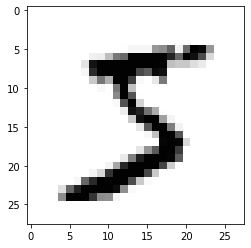

In [ ]:
plt.imshow(scaled_image,cmap='Greys')

In [ ]:
#batch size, width, height, color channels
x_train = x_train.reshape(60000,28,28,1)
x_test  = x_test.reshape(10000,28,28,1)

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, 
          kernel_size=(4,4),
          strides=(1,1),
          input_shape=(28,28,1),
          padding='same',
          activation='relu',))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))

# Output Layer 
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss')

In [ ]:
model.fit(x_train,y_cat_train,epochs=10,
          validation_data=(x_test,y_cat_test),
          callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1351 - accuracy: 0.9595 - val_loss: 0.0669 - val_accuracy: 0.9793
Epoch 2/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0471 - accuracy: 0.9852 - val_loss: 0.0428 - val_accuracy: 0.9860
Epoch 3/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0297 - accuracy: 0.9910 - val_loss: 0.0466 - val_accuracy: 0.9854


In [ ]:
metrics=pd.DataFrame(model.history.history)

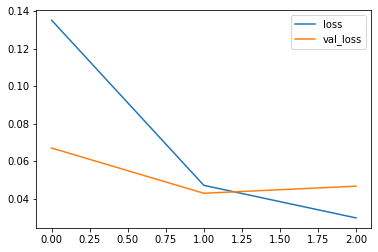

In [ ]:
metrics[['loss','val_loss']].plot()

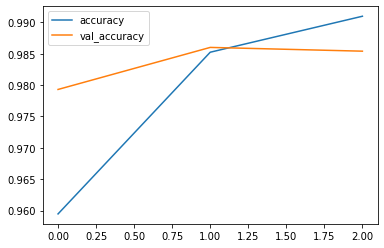

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.0466 - accuracy: 0.9854


[0.04660481587052345, 0.9854000210762024]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
predictions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
y_cat_test.shape

(10000, 10)

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
print(classification_report(y_test,predictions ))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.98      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.98      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.98      0.99      0.99       892
           6       0.98      0.99      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


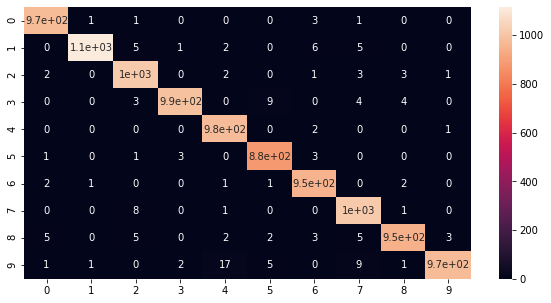

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test,predictions),annot = True)

In [ ]:
my_number = x_test[0]

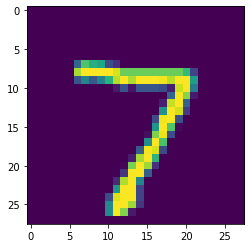

In [ ]:
plt.imshow(my_number.reshape(28,28))

In [ ]:
model.predict_classes(my_number.reshape(1,28,28,1))

array([7])